Import Libraries

In [3]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io
import imageio

print("✅ Libraries imported correctly.")

✅ Libraries imported correctly.


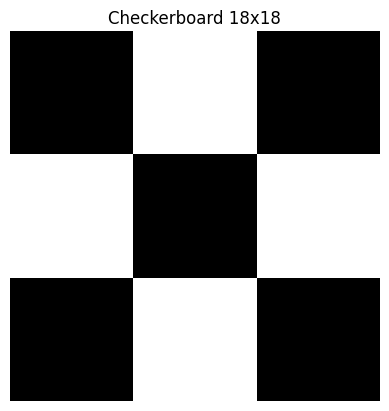

In [ ]:
# Load and display the checkerboard image

dir_checkerboard_18x18 = "Imagenes/checkerboard_18x18.png"
img_checkerboard_18x18 = cv2.imread(dir_checkerboard_18x18) 
checkerboard_18x18_rgb = cv2.cvtColor(img_checkerboard_18x18, cv2.COLOR_BGR2RGB)
plt.imshow(checkerboard_18x18_rgb)
plt.title("Checkerboard 18x18")
plt.axis("off")
plt.show()

In [11]:
# --- Mostrar imagen en escala de grises ---
print(img_checkerboard_18x18)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  

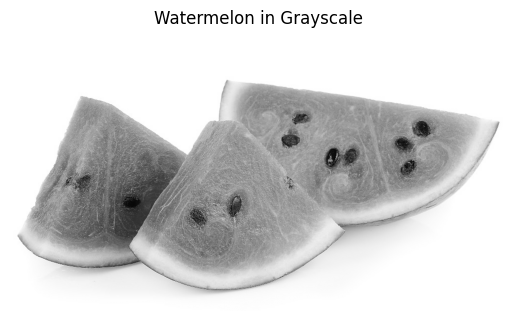

Shape: (549, 976)
Data type: uint8
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [8]:
# Import watermelon image
dir_watermelon = "Imagenes/watermelon.jpg"

# Read the image in grayscale
img_watermelon = cv2.imread(dir_watermelon, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_watermelon, cmap='gray')
plt.title("Watermelon in Grayscale")
plt.axis("off")
plt.show()

# Print the grayscale image array
# Print shape and dtype for better understanding
print("Shape:", img_watermelon.shape)
print("Data type:", img_watermelon.dtype)
print(img_watermelon)
